In [1]:
import json

bias_data_path = '/media/global_data/fair_neural_compression_data/sep_fairness_May30.json'
fid_data_path = '/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64/fid_data/demogpairs/fid.json'
with open(bias_data_path, 'r') as json_file:
    bias_data = json.load(json_file)
    
with open(fid_data_path, 'r') as json_file:
    fid_data = json.load(json_file)

In [3]:
data_path = '/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64'
bpp_data = {}
datasets = ['celebA']
for model_name in fid_data:
    if model_name == 'jpeg':
        continue
    print(f'model_name: {model_name}')
    bpp_data[model_name] = {}
    model_path = f'{data_path}/{model_name}'
    for dataset in datasets:
        print(f'dataset: {dataset}')
        bpp_data[model_name][dataset] = {}
        dataset_path = f'{model_path}/{dataset}'
        for quality in fid_data[model_name]:
            stats_path = f'{dataset_path}/{quality}/stats.json'
            with open(stats_path, 'r') as json_file:
                stats_data = json.load(json_file)
            if "results" in stats_data:
                bpp_data[model_name][dataset][quality] = stats_data['results']['bpp']
            elif "est_bpp" in stats_data:
                bpp_data[model_name][dataset][quality] = stats_data['est_bpp']
bpp_data

model_name: qres17m_lmb_64
dataset: celebA
model_name: mbt2018
dataset: celebA
model_name: hyperprior
dataset: celebA
model_name: cheng2020-attn
dataset: celebA
model_name: qarv
dataset: celebA


{'qres17m_lmb_64': {'celebA': {'1': 0.010865931109864174,
   '3': 0.01401326913838128,
   '6': 0.20318071834509452,
   '9': 0.4595163508693375,
   '12': 0.6997467670037869}},
 'mbt2018': {'celebA': {'q_0001': 0.020051372451441445,
   'q_0009': 0.15650851445510033,
   'q_1': 0.2411556771732332,
   'q_2': 0.3580438339891074,
   'q_3': 0.5174065784374351}},
 'hyperprior': {'celebA': {'q_0001': 0.03605595400890076,
   'q_0009': 0.14813256551099604,
   'q_1': 0.236050330956911,
   'q_2': 0.3631279615610438,
   'q_3': 0.5228528544601424}},
 'cheng2020-attn': {'celebA': {'q_0001': 0.027202235793998834,
   'q_0009': 0.1385776092247803,
   'q_1': 0.20972122410817096,
   'q_2': 0.31385972614460156,
   'q_3': 0.4503114667617908}},
 'qarv': {'celebA': {'lmb_1': 0.0980713503778956,
   'lmb_4': 0.2163293281649039,
   'lmb_8': 0.31725659427533437,
   'lmb_16': 0.443671215409043,
   'lmb_32': 0.5702031093578527}}}

In [4]:
bpp_data

all_bpps_list_fairface, all_bpps_list_celeba = [], []

for model_name in bpp_data:
    for dataset in bpp_data[model_name]:
        for _, bpp in bpp_data[model_name][dataset].items():
            if dataset == 'fairface':
                all_bpps_list_fairface.append(bpp)
            else:
                all_bpps_list_celeba.append(bpp)


In [5]:
fid_data['qres17m'] = fid_data.pop('qres17m_lmb_64')
bpp_data['qres17m'] = bpp_data.pop('qres17m_lmb_64')

In [6]:
bpp_data

all_bpps_list_fairface, all_bpps_list_celeba = [], []

for model_name in bpp_data:
    for dataset in bpp_data[model_name]:
        for _, bpp in bpp_data[model_name][dataset].items():
            if dataset == 'fairface':
                all_bpps_list_fairface.append(bpp)
            else:
                all_bpps_list_celeba.append(bpp)


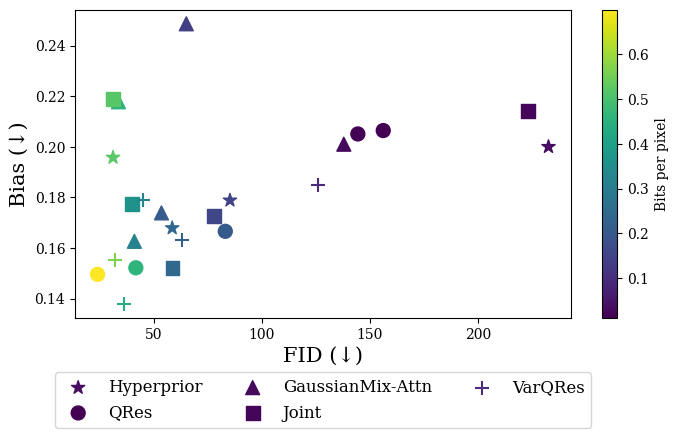

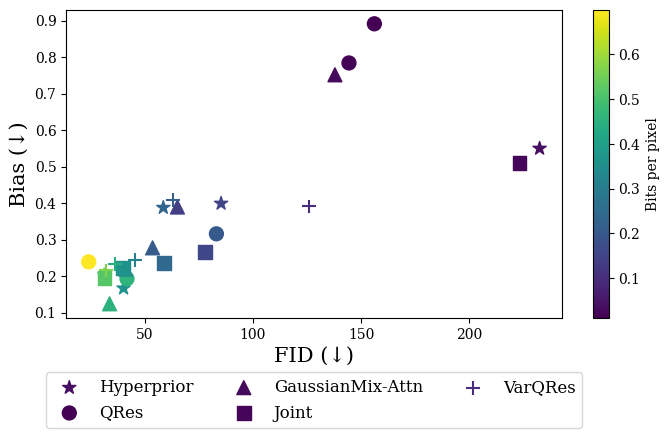

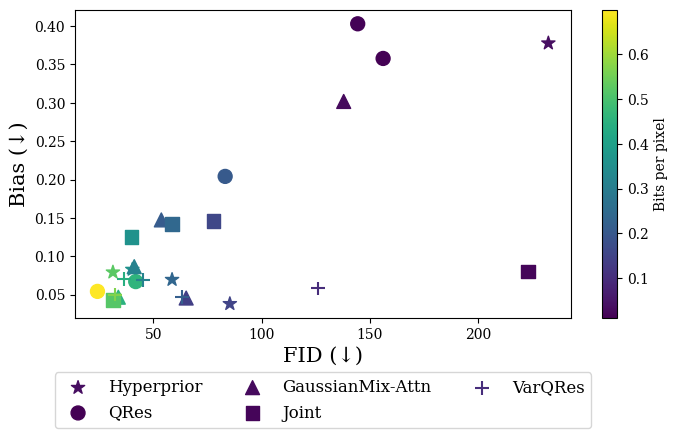

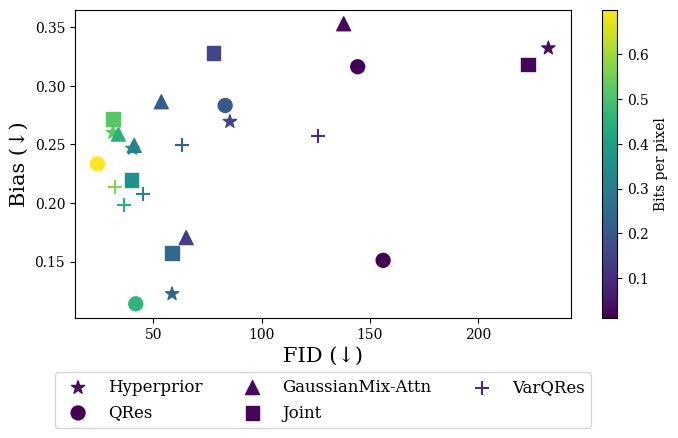

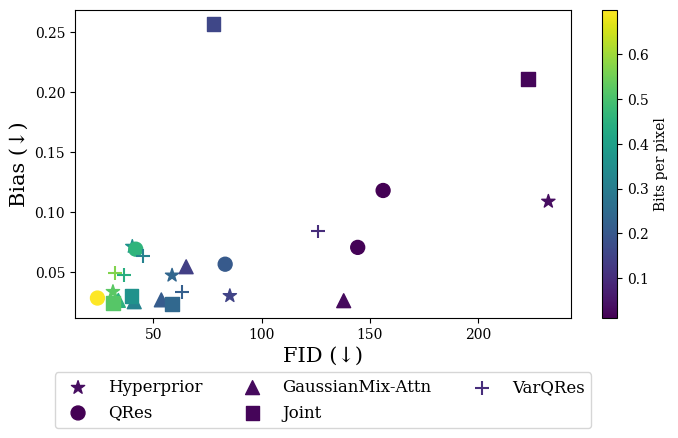

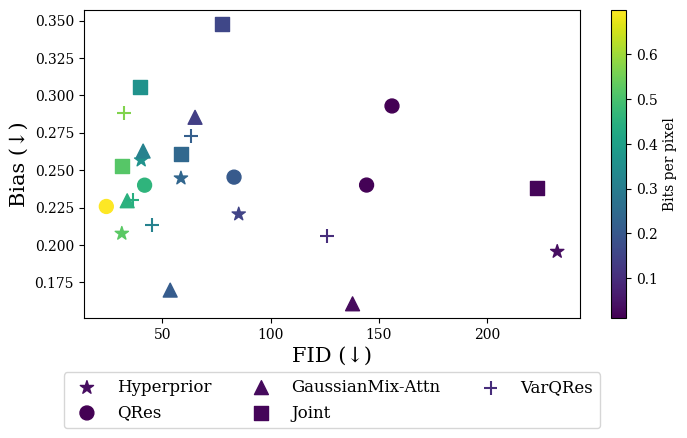

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

# Set the font family globally
mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

model_markers = {
    'qres17m': 'o',
    'mbt2018': 's',
    'hyperprior': '*',
    'cheng2020-attn': '^',
    'qarv': '+'
}
# dataset_colors = {
#     'celebA': '#A52A2A',
#     'fairface': '#04D8B2'
# }
cmap = plt.get_cmap('viridis')

# Sample 4 colors from the colormap

# model_colors = {
#     'qres17m': colors[0],
#     'mbt2018': colors[1],
#     'hyperprior': colors[2],
#     'cheng2020-attn': colors[3]
# }

# dataset_makers = {
#     'celebA': '*',
#     'fairface': 's' 
# }

# bpp_scale = 300
attributes = ['hair_color', 'eye_type', 'hair_type', 'nose_type', 'skin_type', 'lip_type']
# attributes = ['eye_type']
model_names = ["Hyperprior", "QRes", "GaussianMix-Attn", "Joint", "VarQRes"]
dataset_printnames = ['CelebA']
for attribute in attributes:
    fig, ax = plt.subplots(figsize=(8, 4))
    for model_index, model_name in enumerate(bias_data):
        for dataset_index, dataset_name in enumerate(["celebA"]):
            bias = bias_data[model_name][dataset_name][attribute]
            bpps = list(bpp_data[model_name][dataset_name].values())
            norm = mcolors.Normalize(vmin=min(all_bpps_list_celeba), vmax=max(all_bpps_list_celeba))
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            colors = sm.to_rgba(bpps)
            fids = list(fid_data[model_name].values())
            # sizes = np.array(bpps) * bpp_scale
            
            ax.scatter(fids, bias, s=100, c=colors, marker=model_markers[model_name], 
                        label=f'{model_names[model_index]}')
            #  ({dataset_printnames[dataset_index]})
    
    cbar = plt.colorbar(sm, ax=ax, label='Bits per pixel')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12)

    ax.set_xlabel('FID (\u2193)', fontsize=15)
    ax.set_ylabel('Bias (\u2193)', fontsize=15)
    # ax.set_title(f'Attribute {" ".join(attribute.split("_")).title()}', fontsize=15)
    fig.savefig(f'../../plots/new_training_merge_skin_hair_type_color/fid_vs_bias/{attribute}_fid_plot.png', bbox_inches='tight')
    fig.savefig(f'../../plots/new_training_merge_skin_hair_type_color/fid_vs_bias/{attribute}_fid_plot.pdf', bbox_inches='tight') 


In [11]:
bias_data

{'hyperprior': {'celebA': {'skin_type': [0.10862725423623354,
    0.029970598186888187,
    0.04703648177766562,
    0.07102526488365946,
    0.03338318298036569],
   'eye_type': [0.5497739694203663,
    0.3990167840246398,
    0.3876193101513592,
    0.1666441009476628,
    0.20256353061616095],
   'nose_type': [0.33220738690129403,
    0.2694543504640471,
    0.12237316758986061,
    0.24651825573240027,
    0.2600583723286217],
   'lip_type': [0.19557067130250805,
    0.22060207601690995,
    0.24463591921501826,
    0.2566786062918325,
    0.2076687784635608],
   'hair_type': [0.37775500642392446,
    0.0381418177771925,
    0.06963456197991302,
    0.0827968946872103,
    0.07927872818958315],
   'hair_color': [0.20004397406828778,
    0.1788844688043878,
    0.16794197649521114,
    0.1766690663767223,
    0.19580428014264672]},
  'fairface': {'skin_type': [0.07445997246518254,
    0.05225627802603383,
    0.07607436240596743,
    0.0604287226861453,
    0.02667073963007749],
   